# **<center>TP 3 - Réseau de neurones artificiel</center>**

## **<center>Exercice 1 - Prédiction du prix des maisons</center>**

Il s'agit d'un problème de régression dont l'objectif est de modéliser le prix des maisons en milliers de dollars. 

La base de données de maisons comprend 14 attributs numériques et 506 instances. Les attributs d'entrée sont les 13 premieres colonnes et incluent des éléments tels que le taux de criminalité, la proportion d'acres non commerciales, les concentrations de produits chimiques, etc. Le prix des maisons a predire est à  la dernière colonne

La performance du modèle sera évaluée à l'aide de l'erreur quadratique moyenne (MSE).

In [72]:
# Importer les librairies necessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### **Acquisition des données**

Nous pouvons avoir ces données de 2 sources, soit on peut telecharger via un url sur le web, soit on importer de la libraire sklearn

In [79]:
# Premiere alternative: telecharger le fichier de données, 
# par défaut il sera sauvegarder dans le meme repertoire que le notebook
import wget
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
wget.download(url)

In [80]:
# Lire le fichier de données
# On remarque que cet tableau n'a pas d'entete.
dataframe = pd.read_csv("housing.csv", sep=",", header=None)
dataset = dataframe.values
dataframe.head()

In [75]:
# Deuxieme alternative, ces données de housing.csv ont été integré dans la libarairie sklearn et on peut l'importer directement
# Noter qu'il se peut que ce données aient été (ou sera bientot) retirées de sklearn, mais pour le moment ca marche
# Cette version a une entente et c'est celle que nous allons utiliser dans cete exercise
from sklearn.datasets import load_boston
boston_dataset = load_boston()
# Afficher la description des attributs
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [78]:
# Transformer les données en dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['PRICE'] = boston_dataset.target
boston.head()

### **Analyse des données**

Nous voulons voir s'il y a une correlation entre la variable cible et d'autres variables.
Nous allons faire un seul graphique, mais vous pouvez en faire d'autres

In [77]:
# Completez le code suivant pour affichez la distribution des prix des maisons sur un graphique
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(..., bins=30)
plt.show()

### **Transformation des donnees**

In [12]:
# Completer le code pour separer l'ensemble des variables independantes (X) et la variable dependante (Y) 
X = dataset[:,...]
Y = dataset[:...]
...

In [ ]:
# Separer maintenant les sous-ensembles d'entrainement (X_train, Y_train) et les sous-ensembles de test (X_test, Y_test) 
...

In [ ]:
# Normaliser les sous-ensembles d'entrainement
...

### **Construction du modele**

Ci-dessous, nous allons définir plusieurs fonctions pour créer le modèle de base en variant les hyperparametres comme le nombre de couches, le nombre de neurones, le nombre d'iteration, etc.

Le premier est un modèle simple qui a une seule couche cachée entièrement connectée avec le même nombre de neurones que les attributs d'entrée (13). Ce réseau utilise de bonnes pratiques telles que la fonction d'activation du 'relu' pour la couche cachée.
Aucune fonction d'activation n'est utilisée pour la couche de sortie qui a un seul neurone car il s'agit d'un problème de régression et nous nous intéressons à prédire les valeurs numériques directement sans transformation.

In [19]:
# Definir un modele de base 2 couches dont une couche cachée de 13 neurones et une couche de sortie
# La couche des variables d'entrée a 13 noeuds, input_dim=13
def baseline_model():
    # creer le modele
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compiler le modele
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [76]:
# Entrainer le modele pour 100 iterations
regressor = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
regressor.fit(X,Y) 

#Faire des predictions
y_pred = regressor.predict(X)

In [ ]:
# Evaluer la performance avec la fonction mean_squared_error
mse_krr = mean_squared_error(Y, y_pred)
print(mse_krr)

In [ ]:
#Visualiser les resultats dans un diargam
plt.figure(figsize=(20,8))
plt.plot(Y, label="y-original")
plt.plot(y_pred, label="y-predicted")
plt.legend()
plt.show()

Definir un second modele de base plus large a 2 couches dont une couche cachée de 25 neurones et une couche de sortie

In [ ]:
# Implementer la methode suivante pour creer un reseau de neurones plus large avec 2 couches dont
# une couche cachée de 25 neurones et une couche de sortie d'un seul neurone
def model_large():
    # creer le modele
    ...
    ...

In [ ]:
# Entrainer le modele a nouveau pour 100 iterations
...

#Faire des predictions
...

In [ ]:
# Evaluer la performance avec la fonction mean_squared_error
...

In [ ]:
#Visualiser les resultats dans un diargam de taille (25,10)
...

Definir un troisieme modele de base plus profond qui 4 couches dont 3 couches cachées de 13, 8 et 4 neurones respectivement et une couche de sortie. Les couches cachée utilise la fonction d'activation 'relu' tandis que la couche de sortie utilise la fonction d'activation 'linear'

In [ ]:
# Implementer la methode suivante pour creer un reseau de neurones plus profond avec 4 couches dont
# 3 couches cachées de 13, 8 et 4 neurones respectivement et une couche de sortie. 
# Les couches cachée utilise la fonction d'activation 'relu' tandis que la couche de sortie utilise 
# la fonction d'activation 'linear'
def model_profond():
    # creer le modele
    ...

In [ ]:
# Entrainer le modele a nouveau
...

#Faire des predictions
...

In [ ]:
# Evaluer la performance avec la fonction mean_squared_error
...

In [ ]:
#Visualiser les resultats dans un diargam de taille (25,10)
...

## **<center>Exercice 2 - Classification d'images</center>**

L'ensemble de données CIFAR-10 comprend 60 000 photos réparties en 10 classes (d'où le nom CIFAR-10). Les classes incluent des objets tels que des avions, des automobiles, des oiseaux, des chats, etc. L'ensemble de données est divisé de manière standard, où 50 000 images sont utilisées pour entraîner un modèle et les 10 000 autres pour évaluer ses performances.

Les photos sont en couleur avec des composantes rouges, vertes et bleues, mais de petite taille mesurant des carrés de 32 x 32 pixels.

Il existe un concours Kaggle qui utilise les données CIFAR-10. C'est un bon endroit pour rejoindre la discussion sur le développement de nouveaux modèles pour le problème et choisir des modèles et des scripts comme point de départ.

### **Acquisition des données**

L'ensemble de données CIFAR-10 peut facilement être importé de la librairie Keras à l'aide de la fonction cifar10.load_data() pour les stocker dans le répertoire <repertoire courant>/.keras/datasets . Cet ensemble de données est volumineux à 163 mégaoctets, son téléchargement peut donc prendre quelques minutes.

In [65]:
from keras.datasets import cifar10
from matplotlib import pyplot
# lire les données
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### **Analyse des données**

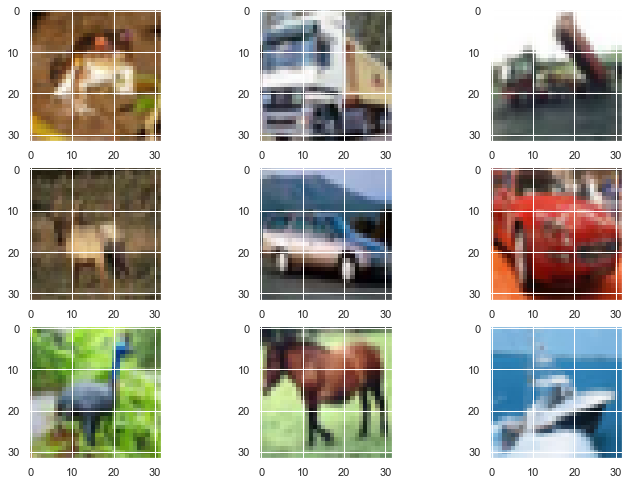

In [41]:
# Affichez un sous-emsemble des données
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i])
pyplot.show()

### **Normalisation des données**

Les valeurs de pixel des images sont comprises entre 0 et 255 pour chacun des canaux rouge, vert et bleu.

Parce que les valeurs d'entrée sont bien comprises, nous pouvons facilement normaliser la plage de 0 à 1 en divisant chaque valeur par l'observation maximale qui est de 255.

In [66]:
# normalisez inputs X_train et X_test from 0-255 to 0.0-1.0
# Completer le code
X_train = ... / 255.0
X_test = ... / 255.0

### **Variables cibles**

Les variables de sortie sont définies comme un vecteur d'entiers de 0 à 1 pour chaque classe. 

Nous pouvons utiliser un "one hot encoding" pour les transformer en une matrice binaire afin de modéliser au mieux le problème de classification. Nous savons qu'il existe 10 classes pour ce problème, et la matrice binaire aaura donc une largeur de 10.

In [48]:
# one hot encoding de la variable de sortie
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [57]:
num_classes

10

### **Réseau de neurones à convolution (CNN)**

Pour résoudre CIFAR-10, nous pouvons commencer par importer toutes les classes et fonctions dont nous aurons besoin

In [67]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Construction du modele

In [ ]:
import tensorflow as tf

# Completer le code pour creer le modele
cifar10_model=tf.keras.models.Sequential()

# Ajoutez une 1ere couche d'entrée convolutive, 32 filtres avec une taille de 3×3, une fonction d'activation 'relu', 
# taille du kernel = 3, image de taille (32,32,3)
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

# Ajoutez une 2e couche convolutive, 32 filtres, taille du kernel = 3, une fonction d'activation 'relu' 
...

# Ajoutez une 3e couche Max Pooling de taille pool_size=2
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
...

# Ajoutez une 4e couche convolutive, 64 filtres, taille du kernel = 3, une fonction d'activation 'relu'
...

# Ajoutez une 5e couche convolutive, 64 filtres, taille du kernel = 3, une fonction d'activation 'relu'
...

# Ajoutez une 6e couche Max Pooling de taille pool_size=2
...

# Ajoutez une couche d'applatissement (Flattening Layer)
cifar10_model.add(tf.keras.layers.Flatten())

# Ajoutez une couche Droput pour supprimer un pourcentage de neurones 
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

# Ajoutez une couche entièrement connectée Dense() avec 12u unités et la fonction d'activation 'relu'
...

# Ajoutez la couche de sortie. Sachant que c'est un modele multi-classes de 10 classes, 
# vous devez completez ici le nombre d'unites et le type de fonction d'activation, 'sigmoid' ou 'softmax'
cifar10_model.add(tf.keras.layers.Dense(units=...,activation='...'))

# Affichez une description du modele
cifar10_model.summary()

In [81]:
# Compilation du modele
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

# Entrainez le modele pour 15 iterations
...

In [82]:
# Evaluer la performance du modele
test_loss, test_accuracy = cifar10_model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

313/313 [==============================] - 8s 17ms/step - loss: 0.7057 - sparse_categorical_accuracy: 0.7727
